In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

project_root = Path.cwd().parent
print(f"Project root: {project_root}")

Project root: /Users/david/Code/msc


In [2]:
# User input: run folder name
run_name = input("Enter the run name: ").strip()
run_folder = project_root / "runs" / run_name
distances_path = run_folder / "distances.csv"

if not distances_path.exists():
    raise FileNotFoundError(f"No distances.csv found at {distances_path}")

df = pd.read_csv(distances_path)
# Drop rows with invalid distance modulus, luminosity distance, or magnitude
valid = np.isfinite(df["mu"]) & np.isfinite(df["d_L_Mpc"]) & np.isfinite(df["m_B"])
df_plot = df.loc[valid].copy()
if len(df_plot) < len(df):
    print(f"Dropped {len(df) - len(df_plot)} row(s) with non-finite mu/d_L/m_B.")
print(f"Loaded {len(df_plot)} object(s) from {distances_path}")
df_plot.head()

Enter the run name: full_test_1
Loaded 418 object(s) from /Users/david/Code/msc/runs/full_test_1/distances.csv


,object_id,z,t0,x0,x1,c,m_B,mu,d_L_Mpc,H0
0,ZTF17aabtvsy,0.06922,59867.852519,0.000907,3.000000,0.142766,18.094810,37.493252,315.246532,65.826684
1,ZTF17aabvong,0.03400,60607.465478,0.005094,0.023578,-0.047579,16.234102,35.893755,150.921454,67.538069
2,ZTF17aacldgo,0.07200,59898.144331,0.000551,-3.000000,0.002172,18.652425,37.583037,328.554557,65.697025
3,ZTF17aadlxmv,0.06200,58878.407994,0.001048,0.735829,0.124077,17.947567,37.242854,280.912290,66.167032
4,ZTF18aaaonon,0.07141,59707.247034,0.000703,-2.999990,-0.086595,18.386448,37.564263,325.726120,65.724479


Saved to /Users/david/Code/msc/runs/full_test_1/hubble_diagram.png


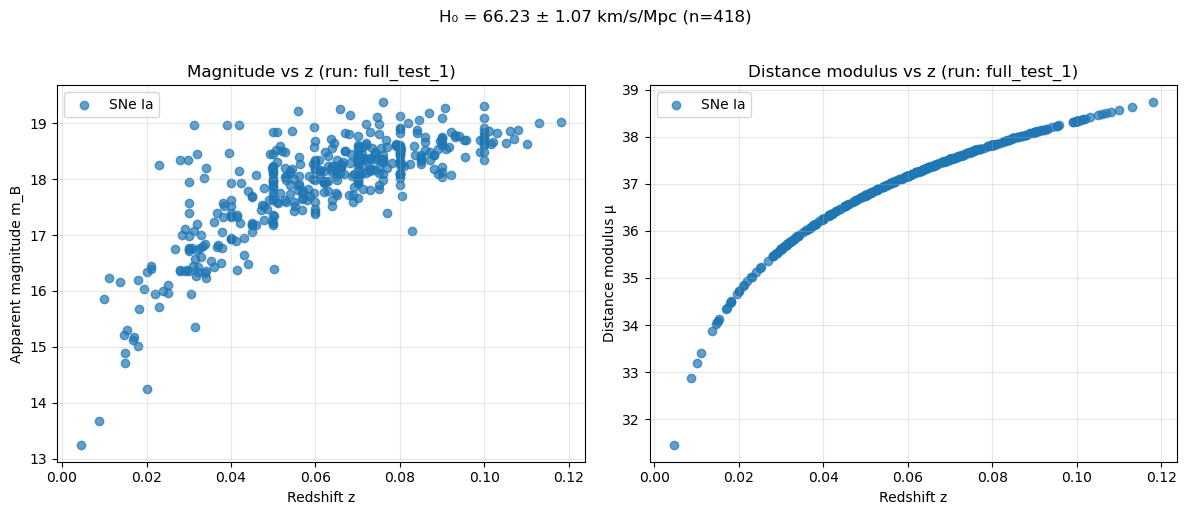

Combined H₀ = 66.23 ± 1.07 km/s/Mpc


In [3]:
# Hubble diagrams
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# apparent magnitude m_B vs redshift
ax1.scatter(df_plot["z"], df_plot["m_B"], alpha=0.7, label="SNe Ia")
ax1.set_xlabel("Redshift z")
ax1.set_ylabel("Apparent magnitude m_B")
ax1.set_title(f"Magnitude vs z (run: {run_name})")
ax1.legend()
ax1.grid(True, alpha=0.3)

# distance modulus μ vs redshift
ax2.scatter(df_plot["z"], df_plot["mu"], alpha=0.7, label="SNe Ia")
ax2.set_xlabel("Redshift z")
ax2.set_ylabel("Distance modulus μ")
ax2.set_title(f"Distance modulus vs z (run: {run_name})")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Combined H0
h0_vals = df_plot["H0"].values
h0_mean = np.mean(h0_vals)
h0_std = np.std(h0_vals, ddof=1) if len(h0_vals) > 1 else 0.0
fig.suptitle(f"H₀ = {h0_mean:.2f} ± {h0_std:.2f} km/s/Mpc (n={len(h0_vals)})", y=1.02)
plt.tight_layout()

out_path = run_folder / "hubble_diagram.png"
fig.savefig(out_path, dpi=150)
print(f"Saved to {out_path}")
plt.show()

print(f"Combined H₀ = {h0_mean:.2f} ± {h0_std:.2f} km/s/Mpc")